In [201]:
import numpy as np
import pickle
import time
import sys
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})

plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [232]:
def generate_bimodal_dist(mu_left, mu_right, sigma_left, sigma_right, N=1000):
    mu1 = np.random.uniform(mu_left, mu_right)
    mu2 = np.random.uniform(mu_left, mu_right)
    sigma1, sigma2 = np.random.uniform(sigma_left, sigma_right, 2)
    X1 = np.random.normal(mu1, sigma1, N)
    X2 = np.random.normal(mu2, sigma2, N)
    X = np.concatenate([X1, X2])
    return X

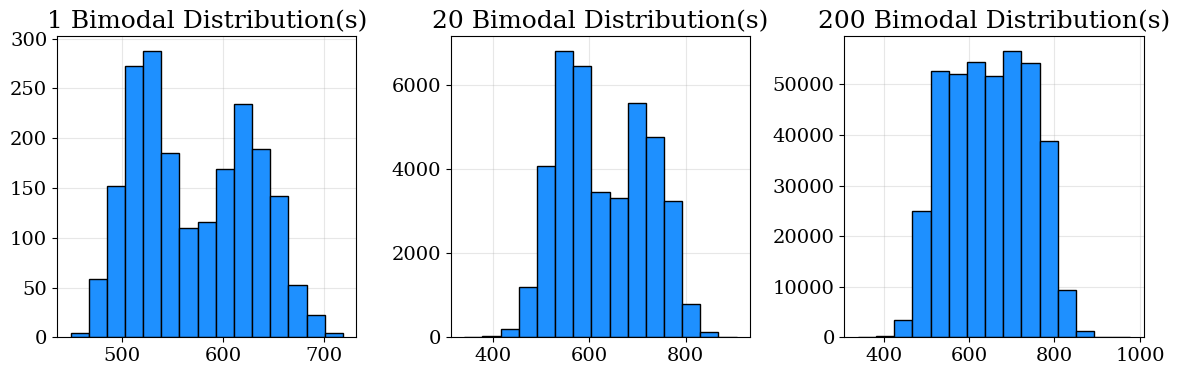

In [241]:
fig, axs = plt.subplots(1,3, figsize=(12,4))

idx_map = {
    0: 0,
    19: 1,
    199: 2,
}

aggregate = np.array([])
for i in range(200):
    aggregate = np.concatenate([aggregate, generate_bimodal_dist(500, 800, 10, 50)])
    if i in idx_map.keys():
        axs[idx_map[i]].hist(aggregate, bins=15, color="dodgerblue", edgecolor="k")
        axs[idx_map[i]].set_title(f"{i+1} Bimodal Distribution(s)")
        
fig.tight_layout() 
plt.savefig(f"aggregate_bimodals.pdf", bbox_inches="tight")
plt.show()